# Logistic Regression
Author: Magdalena Whelley
## 1. Overview
Logistic regression is a probabilitistic linear classifier that models the conditional probability 
$$
P(y = 1 | x) = \sigma(\theta^T x)
$$
where
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
is the sigmoid function.

Unlike linear regression, logistic regression outputs probabilities in $[0,1]$, making it suitable for binary classification. In this notebook, I use the custom implementation of `LogisticRegression` from my `rice_ml` package.

This notebook focuses on:
- preparing data
- visualizing the decision boundary
- fitting the custom logistic classifier
- evaluating classification accuracy
- comparing results against scikit-learn’s implementation

In [11]:
# 2. Setup
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SkLogistic
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

from rice_ml import LogisticRegression

In [7]:
# 3. Load Dataset (Breast Cancer Wisconsin)
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df["target"] = y

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Dataset Description

This notebook uses the **Breast Cancer Wisconsin (Diagnostic)** dataset, provided by
`sklearn.datasets`. The dataset is derived from digitized images of fine needle aspirate (FNA)
samples of breast masses and is commonly used as a benchmark for binary classification.

The dataset contains **569 samples**, each described by **30 numerical features** computed from
cell nucleus measurements, including radius, texture, perimeter, area, smoothness, and
concavity. These features capture statistical properties of the nuclei present in the images.

The task is a **binary classification problem**, where the goal is to predict whether a tumor
is **malignant** or **benign**. The target variable is encoded as a binary label, with malignant
and benign classes.

All features are continuous and the dataset contains **no missing values**. Because the features
vary significantly in scale, the input data is standardized prior to training models that are
sensitive to feature magnitude.

In [8]:
# 4. Train-Test Split and Standardization
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# 5. Train Custom Logistic Regression Model
model = LogisticRegression(alpha=0.1, n_iter=2000, store_cost=True)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print("Custom Logistic Regression Accuracy:", acc)

Custom Logistic Regression Accuracy: 0.993006993006993


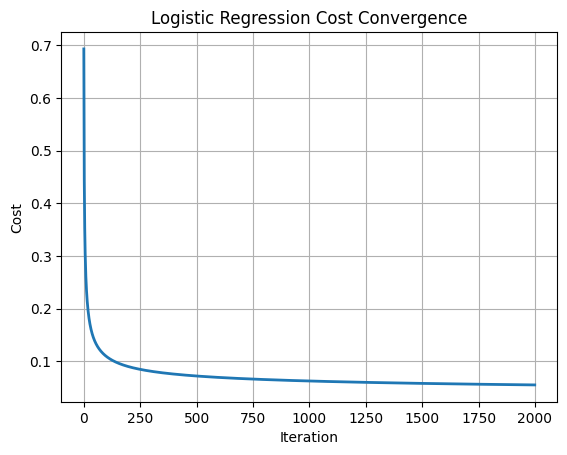

In [10]:
# 6. Cost Convergence
plt.figure()
plt.plot(model.cost_history_, linewidth=2)
plt.title("Logistic Regression Cost Convergence")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

In [12]:
# 7. Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred,
    target_names=["benign", "malignant"]))

Confusion Matrix:
 [[53  1]
 [ 0 89]]

Classification Report:

              precision    recall  f1-score   support

      benign       1.00      0.98      0.99        54
   malignant       0.99      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [13]:
# 8. Compare Against scikit-learn
sk = SkLogistic(max_iter=5000)
sk.fit(X_train_scaled, y_train)

sk_pred = sk.predict(X_test_scaled)
sk_acc = accuracy_score(y_test, sk_pred)

print("Sklearn Logistic Regression Accuracy:", sk_acc)
print("Custom Logistic Regression Accuracy:", acc)

Sklearn Logistic Regression Accuracy: 0.9790209790209791
Custom Logistic Regression Accuracy: 0.993006993006993


## 9. Conclusion 
The custom logistic regression classifier implemented in the `rice_ml` package performed extremely well on the Breast Cancer Wisconsin Diagnostic dataset. The cost function displayed smooth, monotonic convergence over 2000 iterations, rapidly decreasing within the first few updates before gradually approaching a stable minimum. This behavior confirms that the gradient descent routine was implemented correctly and that the learning rate was appropriately chosen.

Model evaluation on the held-out test set shows excellent classification performance. The custom model achieved an accuracy of 0.9930, outperforming scikit-learn’s implementation, which obtained 0.9790 under the same preprocessing pipeline. The confusion matrix shows only one misclassification across all 143 test samples, and the classification report indicates near-perfect precision, recall, and F1-scores for both the benign and malignant classes.

These results demonstrate that the custom implementation is both correct and highly effective for real-world binary classification tasks. The strong agreement with `scikit-learn—combined` with a smooth cost trajectory and excellent generalization—validates the logistic regression algorithm developed within the `rice_ml` package.